In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from Utilities.basic_units import radians
from Utilities import orbits as orb
from Utilities import sections as sec

from Utilities.operators import make_tree, from_cylindric
from Utilities.time_extractor import days_since_distruption
matplotlib.rcParams['figure.dpi'] = 150

In [2]:
G = 1
m = 4
Mbh = 10**m
beta = 1
mstar = .5
Rstar = .47
n = 1.5
check = 'Low' # '' or 'HiRes' or 'Res20'
check1 = 'HiRes' 
check2 = 'Res20'
folder = f'R{Rstar}M{mstar}BH{Mbh}beta{beta}S60n{n}'
snap = '164'
snap2 = '169'
path = f'TDE/{folder}{check}/{snap}'
path1 = f'TDE/{folder}{check1}/{snap}'
path2 = f'TDE/{folder}{check2}/{snap2}'
#saving_path = f'Figs/{folder}/{check}'
#print(f'We are in: {path}, \nWe save in: {saving_path}')
is_tde = True
threshold=1/3

Rt = Rstar * (Mbh/mstar)**(1/3)
Rp =  Rt / beta
R0 = 0.6 * Rp
apo = Rt**2 / Rstar #2 * Rt * (Mbh/mstar)**(1/3)

G_SI = 6.6743e-11
Msol = 2e30 #1.98847e30 # kg
Rsol = 7e8 #6.957e8 # m
t = np.sqrt(Rsol**3 / (Msol*G_SI ))
c = 3e8 / (7e8/t)

Rs = 2*G*Mbh / c**2

# cfr tidal disruption and at smoothing lenght
xcfr, ycfr, cfr = orb.make_cfr(Rt)
xcfr0, ycfr0, cfr0 = orb.make_cfr(R0)

Load data

In [3]:
# sim_tree, X, Y, Z, Vol, VX, VY, VZ, Den, Press, Temp, IE, Diss, Entropy = make_tree(path, snap, is_tde, energy = True)
data = make_tree(path, snap, is_tde, energy = False)
data1 = make_tree(path1, snap, is_tde, energy = False)
data2 = make_tree(path2, snap2, is_tde, energy = False)

# div = np.load(f'{folder}/{snap}/DivV_{snap}.npy')
# shockzone = np.loadtxt(f'data/{snap}/shockzone_{snap}.txt')
# shocksurface = np.loadtxt(f'data/{snap}/shocksurface_{snap}.txt')

# R = np.sqrt(data.X**2 + data.Y**2 + data.Z**2)
THETA, RADIUS_cyl = orb.to_cylindric(data.X, data.Y)
THETA1, RADIUS_cyl1 = orb.to_cylindric(data1.X, data1.Y)
THETA2, RADIUS_cyl2 = orb.to_cylindric(data2.X, data2.Y)

# V = np.sqrt(data.VX**2 + data.VY**2 + data.VZ**2)
# Vcyl = np.sqrt(data.VX**2 + data.VY**2)
# orb_en = orb.orbital_energy(RADIUS_cyl, Vcyl, G, Mbh)
dim_cell = data.Vol**(1/3) 
dim_cell1 = data1.Vol**(1/3) 
dim_cell2 = data2.Vol**(1/3) 

tfb = days_since_distruption(f'{path}/snap_{snap}.h5', m, mstar, Rstar, choose = 'tfb')

# Shock zone
# idx_zone = shockzone[0]
# idx_zone = np.array([int(i) for i in idx_zone])
# x_zone = X[idx_zone]
# y_zone = Y[idx_zone]
# z_zone = Z[idx_zone]
# Vx_zone = VX[idx_zone]
# Vy_zone = VY[idx_zone]
# Vz_zone = VZ[idx_zone]
# Diss_zone = Diss[idx_zone]
# dim_cell_zone = dim_cell[idx_zone]
# div_zone = div[idx_zone]

# Shock surface
# idx_surf = shocksurface[0]
# idx_surf = np.array([int(i) for i in idx_surf])
# x_surf = x_zone[idx_surf]
# y_surf = y_zone[idx_surf]
# z_surf = z_zone[idx_surf]
# Vx_surf = Vx_zone[idx_surf]
# Vy_surf = Vy_zone[idx_surf]
# dim_cell_surf = dim_cell_zone[idx_surf]
# div_surf = div_zone[idx_surf]

days after disruption: 1.3532153925058021 // t_fall: 2.5777261297507925 // sim_time: 73.40236449912129


Midplane 

In [4]:
midplane = np.abs(data.Z) < dim_cell
X_midplane, Y_midplane, Z_midplane, dim_midplane, Mass_midplane, Den_midplane, = \
    sec.make_slices([data.X, data.Y, data.Z, dim_cell, data.Mass, data.Den], midplane)

midplane1 = np.abs(data1.Z) < dim_cell1
X_midplane1, Y_midplane1, Z_midplane1, dim_midplane1, Mass_midplane1, Den_midplane1 = \
    sec.make_slices([data1.X, data1.Y, data1.Z, dim_cell1, data1.Mass, data1.Den], midplane1)

midplane2 = np.abs(data2.Z) < dim_cell2
X_midplane2, Y_midplane2, Z_midplane2, dim_midplane2, Mass_midplane2, Den_midplane2 = \
    sec.make_slices([data2.X, data2.Y, data2.Z, dim_cell2, data2.Mass, data2.Den], midplane2)

Tangent and transverse plane

In [5]:
theta_lim = np.pi#3*np.pi/4
step = 0.1
theta_params = [-theta_lim, theta_lim, step]
theta_arr = np.arange(*theta_params)

#r_orbit = orb.keplerian_orbit(theta_arr, apo, a = Rp, ecc = 0.972)
_, r_orbit = orb.find_maximum(X_midplane, Y_midplane, dim_midplane, Den_midplane, theta_params)
x_orbit, y_orbit = from_cylindric(theta_arr, r_orbit)

_, r_orbit1 = orb.find_maximum(X_midplane1, Y_midplane1, dim_midplane1, Den_midplane1, theta_params)
x_orbit1, y_orbit1 = from_cylindric(theta_arr, r_orbit1)

_, r_orbit2 = orb.find_maximum(X_midplane2, Y_midplane2, dim_midplane2, Den_midplane2, theta_params)
x_orbit2, y_orbit2 = from_cylindric(theta_arr, r_orbit2)

In [6]:
# idx = 12
# theta_chosen = theta_arr[idx]
# radius_chosen = r_orbit[idx]
# x_chosen, y_chosen = from_cylindric(theta_chosen, radius_chosen)

# condition_tg = sec.tangent_plane(data.X, data.Y, dim_cell, x_orbit, y_orbit, theta_chosen, radius_chosen)
# X_tg, Y_tg, Z_tg, Den_tg, Temp_tg, theta_tg = \
#     sec.make_slices([data.X, data.Y, data.Z, data.Den, data.Temp, THETA], condition_tg)
# X_tg_midplane = X_tg[np.abs(Z_tg) < dim_cell[condition_tg]]
# Y_tg_midplane = Y_tg[np.abs(Z_tg) < dim_cell[condition_tg]]

# condition_tra, x_onplane, x0 = sec.transverse_plane(data.X, data.Y, dim_cell, x_orbit, y_orbit, theta_chosen, radius_chosen, coord= True)
# X_tra, Y_tra, Z_tra, Den_tra, RADIUS_cyl_tra = \
#     sec.make_slices([data.X, data.Y, data.Z, data.Den, RADIUS_cyl], condition_tra)
# X_tra_midplane = X_tra[np.abs(Z_tra) < dim_cell[condition_tra]]
# Y_tra_midplane = Y_tra[np.abs(Z_tra) < dim_cell[condition_tra]]
# x_onplane_midplane = x_onplane[np.abs(Z_tra) < dim_cell[condition_tra]]

# condition_rad = sec.radial_plane(data.X, data.Y, dim_cell, theta_chosen)
# X_rad, Y_rad, Z_rad, Den_rad, RADIUS_cyl_rad = \
#     sec.make_slices([data.X, data.Y, data.Z, data.Den, RADIUS_cyl], condition_rad)
# X_rad_midplane = X_rad[np.abs(Z_rad) < dim_cell[condition_rad]]
# Y_rad_midplane = Y_rad[np.abs(Z_rad) < dim_cell[condition_rad]]

# vminrho = -8
# vmaxrho = -7.2
# plt.figure(figsize = (12,4))
# img = plt.scatter(X_midplane, Y_midplane, c = np.log10(Den_midplane), s = .1, cmap = 'viridis', vmin = vminrho, vmax = vmaxrho)
# cbar = plt.colorbar(img)
# plt.scatter(0,0,s=40, c= 'k')
# plt.contour(xcfr, ycfr, cfr, [0], linestyles = 'dotted', colors = 'k')
# cbar.set_label(r'$\log_{10}$ Density', fontsize = 16)
# plt.plot(x_orbit, y_orbit, c = 'r')
# plt.scatter(X_tg_midplane, Y_tg_midplane, s = 0.1, c = 'k')
# plt.scatter(X_tra_midplane, Y_tra_midplane, s = 1, c = 'k')
# plt.scatter(x_chosen, y_chosen, marker = 'x', s = 27, c = 'b')
# plt.xlim(-350,30)
# plt.ylim(-80,80)
# plt.xlabel(r'X [$R_\odot$]', fontsize = 18)
# plt.ylabel(r'Y [$R_\odot$]', fontsize = 18)
# # plt.savefig(f'Figs/test/section/new/cross_{idx}.png')

In [7]:
# x_cm, y_cm, den_cm, x_low, y_low, den_low, x_high, y_high, den_high, width, ncells  = orb.find_width_boundaries(X_midplane, Y_midplane, dim_midplane, Den_midplane, x_orbit, y_orbit, theta_chosen, radius_chosen, threshold = 0.33)
# x0, den_cm, x_low_h, z_low_h, den_low_h, x_high_h, z_high_h, den_high_h, height, ncells_h = orb.find_height_boundaries(data.X, data.Y, data.Z, dim_cell, data.Den, x_orbit, y_orbit, theta_chosen, radius_chosen, den_cm, threshold = 0.33)
# cm = np.array([x_cm, y_cm, den_cm])
# lower_tube = np.array([x_low, y_low, den_low])
# upper_tube = np.array([x_high, y_high, den_high])

In [8]:
# print(f'Width single code: {width}, ncells: {ncells}')
# print(f'Height single code: {height}, ncells: {ncells_h}')
# print(f'Width double code: {w_params}, Height double code: {h_params}')

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_89350/381952288.py:55: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax[0][1].set_xlim(lower_tube_w[1], upper_tube_w[1]) # T coordinates for width
python(89418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


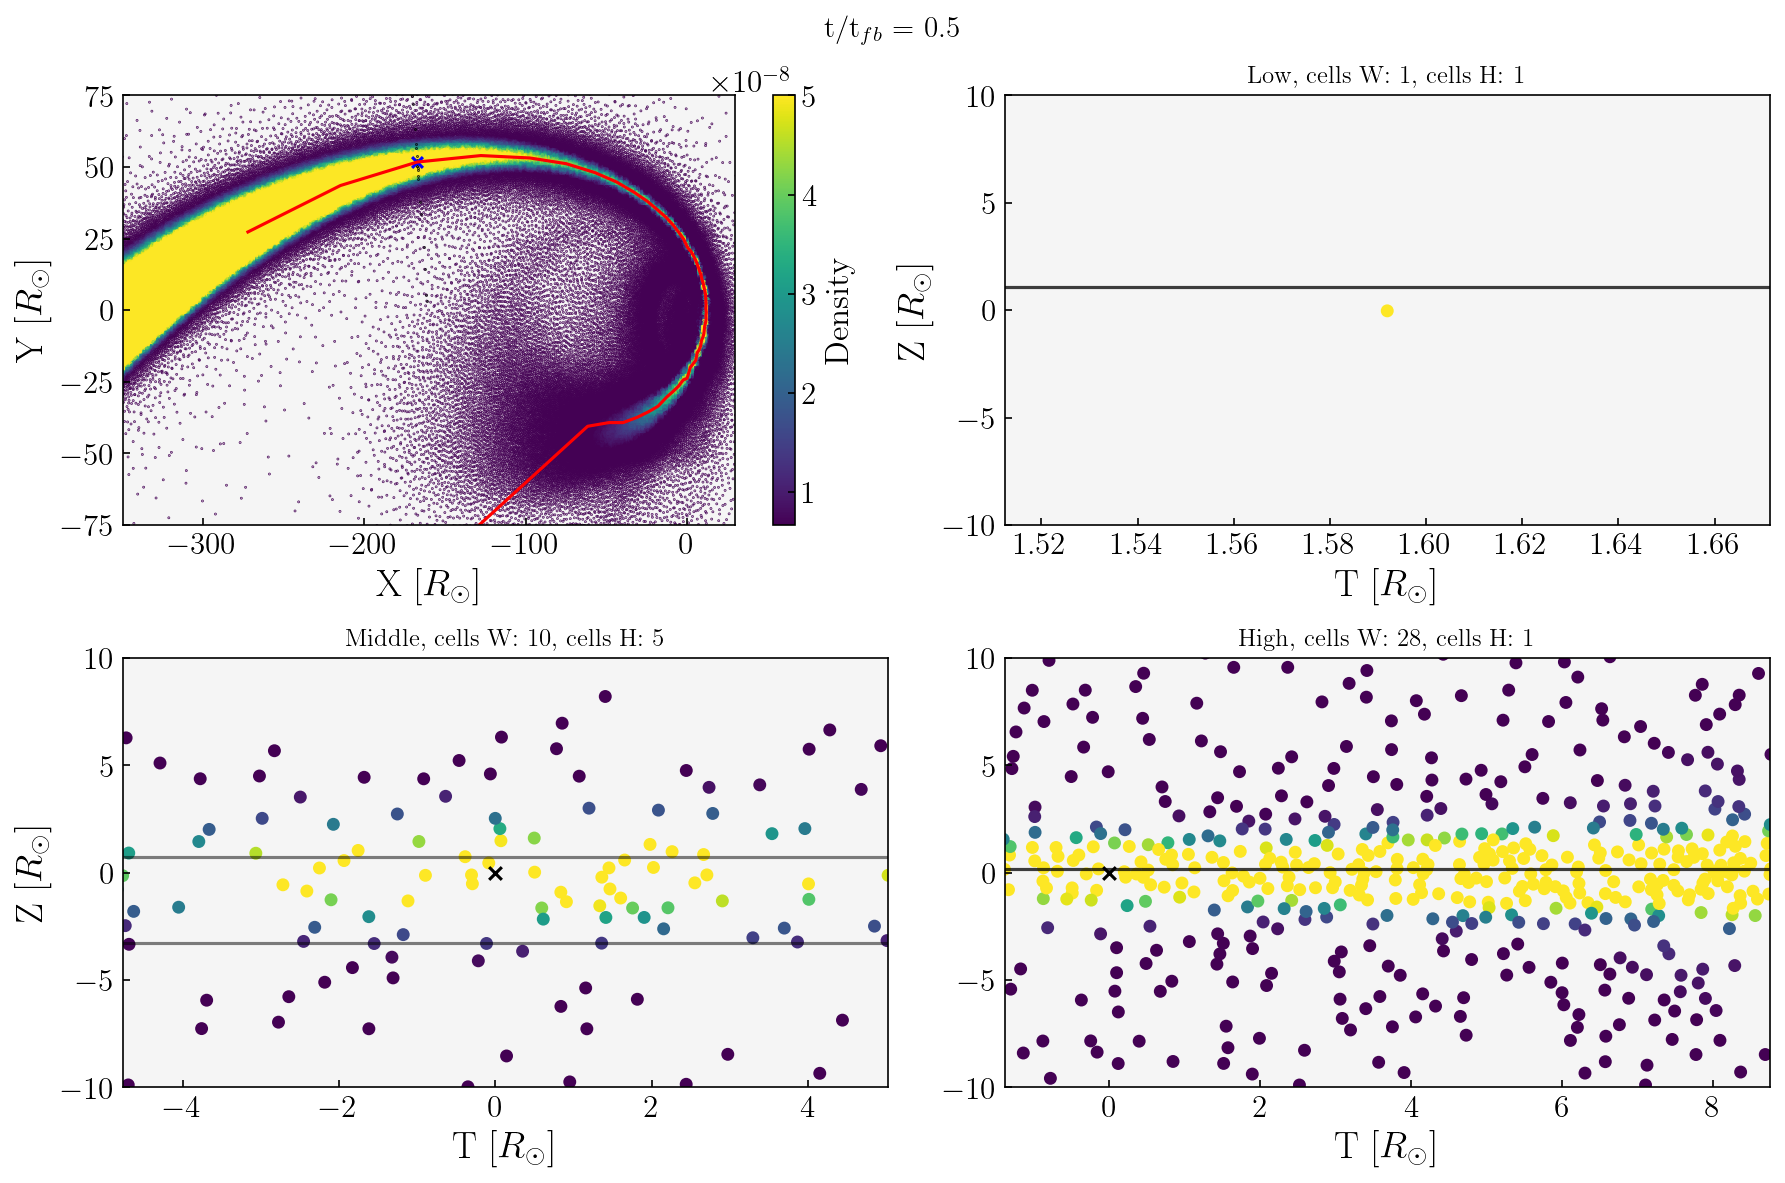

In [9]:
vmaxrho = 5e-8
vminrho = 1/3 * vmaxrho - 1e-8 # -1 to see the lower values
# for idx in range(1, 55):
idx = 3
theta_chosen = theta_arr[idx]

radius_chosen = r_orbit[idx]
x_chosen, y_chosen = from_cylindric(theta_chosen, radius_chosen)
radius_chosen1 = r_orbit1[idx]
x_chosen1, y_chosen1 = from_cylindric(theta_chosen, radius_chosen1)
radius_chosen2 = r_orbit2[idx]
x_chosen2, y_chosen2 = from_cylindric(theta_chosen, radius_chosen2)

condition_tra, x_onplane, x0 = sec.transverse_plane(data.X, data.Y, dim_cell, x_orbit, y_orbit, theta_chosen, radius_chosen, coord= True)
X_tra, Y_tra, Z_tra, Den_tra, RADIUS_cyl_tra = \
    sec.make_slices([data.X, data.Y, data.Z, data.Den, RADIUS_cyl], condition_tra)
X_tra_midplane = X_tra[np.abs(Z_tra) < dim_cell[condition_tra]]
Y_tra_midplane = Y_tra[np.abs(Z_tra) < dim_cell[condition_tra]]
x_onplane_midplane = x_onplane[np.abs(Z_tra) < dim_cell[condition_tra]]
cm_double, lower_tube_w, upper_tube_w, lower_tube_h, upper_tube_h, w_params, h_params = orb.find_stream_boundaries(data.X, data.Y, data.Z, dim_cell, data.Den, x_orbit, y_orbit, theta_chosen, radius_chosen, threshold = 0.33)

# do the same for data1
condition_tra1, x_onplane1, x01 = sec.transverse_plane(data1.X, data1.Y, dim_cell1, x_orbit1, y_orbit1, theta_chosen, radius_chosen1, coord= True)
X_tra1, Y_tra1, Z_tra1, Den_tra1, RADIUS_cyl_tra1 = \
    sec.make_slices([data1.X, data1.Y, data1.Z, data1.Den, RADIUS_cyl1], condition_tra1)
X_tra_midplane1 = X_tra1[np.abs(Z_tra1) < dim_cell1[condition_tra1]]
Y_tra_midplane1 = Y_tra1[np.abs(Z_tra1) < dim_cell1[condition_tra1]]
x_onplane_midplane1 = x_onplane1[np.abs(Z_tra1) < dim_cell1[condition_tra1]]
cm_double1, lower_tube_w1, upper_tube_w1, lower_tube_h1, upper_tube_h1, w_params1, h_params1 = orb.find_stream_boundaries(data1.X, data1.Y, data1.Z, dim_cell1, data1.Den, x_orbit1, y_orbit1, theta_chosen, radius_chosen1, threshold = 0.33)

# do the same for data2
condition_tra2, x_onplane2, x02 = sec.transverse_plane(data2.X, data2.Y, dim_cell2 ,x_orbit2, y_orbit2, theta_chosen, radius_chosen2, coord= True)
X_tra2, Y_tra2, Z_tra2, Den_tra2, RADIUS_cyl_tra2 = \
    sec.make_slices([data2.X, data2.Y, data2.Z, data2.Den, RADIUS_cyl2], condition_tra2)
X_tra_midplane2 = X_tra2[np.abs(Z_tra2) < dim_cell2[condition_tra2]]
Y_tra_midplane2 = Y_tra2[np.abs(Z_tra2) < dim_cell2[condition_tra2]]
x_onplane_midplane2 = x_onplane2[np.abs(Z_tra2) < dim_cell2[condition_tra2]]
cm_double2, lower_tube_w2, upper_tube_w2, lower_tube_h2, upper_tube_h2, w_params2, h_params2 = orb.find_stream_boundaries(data2.X, data2.Y, data2.Z, dim_cell2, data2.Den, x_orbit2, y_orbit2, theta_chosen, radius_chosen2, threshold = 0.33)
                                
fig, ax = plt.subplots(2,2, figsize = (12,8))
img = ax[0][0].scatter(X_midplane1, Y_midplane1, c = Den_midplane1, s = .1, cmap = 'viridis', vmin = vminrho, vmax = vmaxrho)
cbar = plt.colorbar(img)
cbar.set_label(r' Density', fontsize = 16)
ax[0][0].plot(x_orbit1[1:-1], y_orbit1[1:-1], c = 'r')
#ax[0][0].scatter(X_tg_midplane, Y_tg_midplane, s = 0.1, c = 'k')
ax[0][0].scatter(X_tra_midplane1, Y_tra_midplane1, s = 0.1, c = 'k')
ax[0][0].scatter(x_chosen1, y_chosen1, marker = 'x', s = 27, c = 'b')
ax[0][0].set_xlim(-350,30)
ax[0][0].set_ylim(-75,75)
ax[0][0].set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax[0][0].set_ylabel(r'Y [$R_\odot$]', fontsize = 18)

img1 = ax[0][1].scatter(x_onplane, Z_tra, c = Den_tra,  cmap = 'viridis', s = 27, vmin = vminrho, vmax = vmaxrho)
ax[0][1].scatter(x0, 0, marker = 'x', s = 37, c = 'k', alpha = 1)
ax[0][1].set_xlim(lower_tube_w[1], upper_tube_w[1]) # T coordinates for width
ax[0][1].axhline(lower_tube_h[0], c = 'k', alpha = 0.5)
ax[0][1].axhline(upper_tube_h[0], c = 'k', alpha = 0.5)
ax[0][1].set_ylim(-10,10)
ax[0][1].set_xlabel(r'T [$R_\odot]$', fontsize = 18)
ax[0][1].set_ylabel(r'Z [$R_\odot$]', fontsize = 18)
ax[0][1].set_title(f'{check}, cells W: {int(w_params[1])}, cells H: {int(h_params[1])}', fontsize = 12)

img1 = ax[1][0].scatter(x_onplane1, Z_tra1, c = Den_tra1,  cmap = 'viridis', s = 27, vmin = vminrho, vmax = vmaxrho)
ax[1][0].scatter(x01, 0, marker = 'x', s = 37, c = 'k', alpha = 1)
ax[1][0].set_xlim(lower_tube_w1[1], upper_tube_w1[1]) # T coordinates for width
ax[1][0].axhline(lower_tube_h1[0], c = 'k', alpha = 0.5)
ax[1][0].axhline(upper_tube_h1[0], c = 'k', alpha = 0.5)
ax[1][0].set_ylim(-10,10)
ax[1][0].set_xlabel(r'T [$R_\odot]$', fontsize = 18)
ax[1][0].set_ylabel(r'Z [$R_\odot$]', fontsize = 18)
ax[1][0].set_title(f'Middle, cells W: {int(w_params1[1])}, cells H: {int(h_params1[1])}', fontsize = 12)

img1 = ax[1][1].scatter(x_onplane2, Z_tra2, c = Den_tra2,  cmap = 'viridis', s = 27, vmin = vminrho, vmax = vmaxrho)
ax[1][1].scatter(x02, 0, marker = 'x', s = 37, c = 'k', alpha = 1)
ax[1][1].set_xlim(lower_tube_w2[1], upper_tube_w2[1]) # T coordinates for width
ax[1][1].axhline(lower_tube_h2[0], c = 'k', alpha = 0.5)
ax[1][1].axhline(upper_tube_h2[0], c = 'k', alpha = 0.5)
ax[1][1].set_ylim(-10,10)
ax[1][1].set_xlabel(r'T [$R_\odot]$', fontsize = 18)
#ax[1][1].set_ylabel(r'Z [$R_\odot$]', fontsize = 18)
ax[1][1].set_title(f'High, cells W: {int(w_params2[1])}, cells H: {int(h_params2[1])}', fontsize = 12)

plt.suptitle(r't/t$_{fb}$ = ' + str(np.round(tfb,1)), fontsize = 14)
plt.tight_layout()

#plt.savefig(f'Figs/{folder}/multiple/wH{idx}.png')

In [10]:
# vmaxrho = 5e-8
# vminrho = 1/3 * vmaxrho -1e-8 # -1 to see the lower values
# fig, ax = plt.subplots(2,2, figsize = (12,8))
# img = ax[0][0].scatter(X_midplane, Y_midplane, c = Den_midplane, s = .1, cmap = 'viridis', vmin = vminrho, vmax = vmaxrho)
# cbar = plt.colorbar(img)
# cbar.set_label(r' Density', fontsize = 16)
# ax[0][0].plot(x_orbit, y_orbit, c = 'r')
# ax[0][0].scatter(X_tg_midplane, Y_tg_midplane, s = 0.1, c = 'k')
# ax[0][0].scatter(X_tra_midplane, Y_tra_midplane, s = 0.1, c = 'k')
# ax[0][0].scatter(x_chosen, y_chosen, marker = 'x', s = 27, c = 'b')
# ax[0][0].set_xlim(-100,30)
# ax[0][0].set_ylim(-60,60)
# #ax[0][0].set_xlabel(r'X [$R_\odot$]', fontsize = 18)
# ax[0][0].set_ylabel(r'Y [$R_\odot$]', fontsize = 18)

# img1 = ax[1][0].scatter(X_midplane, Y_midplane, c = np.log10(Temp_midplane), s = .1, cmap = 'inferno', vmin = 5, vmax = 7)
# cbar1 = plt.colorbar(img1)
# cbar1.set_label(r'$\log_{10}$ Temperature', fontsize = 16)
# ax[1][0].set_xlim(-60,30)
# ax[1][0].set_ylim(-40,40)
# ax[1][0].set_xlabel(r'X [$R_\odot$]', fontsize = 18)
# ax[1][0].set_ylabel(r'Y [$R_\odot$]', fontsize = 18)

# img2 = ax[0][1].scatter(theta_tg * radians, Z_tg, xunits=radians, c = Den_tg,  cmap = 'viridis', s = 4, vmin = vminrho, vmax = vmaxrho)
# # cbar2 = plt.colorbar(img2)#, format='%.0e')
# # cbar2.set_label(r'$\log_{10}$ Density', fontsize = 14)
# ax[0][1].scatter(theta_chosen, 0, marker = 'x', s = 27, c = 'b')
# ax[0][1].set_xlim(theta_chosen-np.pi/4, theta_chosen+np.pi/4)
# ax[0][1].set_ylim(-5,5)
# ax[0][1].set_xlabel(r'$\theta$', fontsize = 18)
# ax[0][1].set_ylabel(r'Z [$R_\odot$]', fontsize = 18)

# img3 = ax[1][1].scatter(x_onplane, Z_tra, c = Den_tra,  cmap = 'viridis', s = 4, vmin = vminrho, vmax = vmaxrho)
# # cbar3 = plt.colorbar(img3)#, format='%.0e')
# # cbar3.set_label(r'$\log_{10}$ Density', fontsize = 14)
# ax[1][1].scatter(x0, 0, marker = 'x', s = 27, c = 'b', alpha = 0.5)
# #ax[1][1].set_xlim(x_onplane_lower, x_onplane_upper)
# ax[1][1].set_xlim(-10,10)
# ax[1][1].set_ylim(-10,10)
# ax[1][1].set_xlabel(r'T [$R_\odot]$', fontsize = 18)
# ax[1][1].set_ylabel(r'Z [$R_\odot$]', fontsize = 18)

# plt.suptitle(r't/t$_{fb}$ = ' + str(np.round(tfb,3)) + f', check: {check}', fontsize = 14)
# plt.tight_layout()

# #plt.savefig(f'Figs/{folder}/{check}/cross{snap}.png')

In [11]:
# fig, ax = plt.subplots(1,1, figsize = (6,4))
# img = ax.scatter(X_midplane, Y_midplane, c = Diss_midplane/Vol_midplane, s = 5, cmap = 'jet', vmin = -1e-6, vmax = 1e-6)
# cbar = plt.colorbar(img)#, format='%.0e')
# cbar.set_label('energy density dissipation', fontsize = 16)
# ax.plot(zone_cross_x, zone_cross_y, 'ks', markerfacecolor='none', ms = 5, markeredgecolor='k', label = 'shock zone')
# #ax.plot(x_cross_surf, y_cross_surf, 'ks', markerfacecolor='none', ms = 5, markeredgecolor='k', label = 'shock surface')
# ax.set_xlim(3,29)
# ax.set_ylim(-18,23)
# ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
# ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
# plt.grid()
# plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
# plt.legend(loc = 'upper right')
# #plt.savefig('Figs/EnDisszone{snap}.png')